In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,"../../src/main")

In [4]:
import data

In [21]:
reload (data)

<module 'data' from '../../src/main/data.py'>

In [22]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [25]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwv']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [26]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['signal']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [27]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwvdis']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvdis


In [40]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwvcos']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvcos


In [50]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwvsoftmax']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvsoftmax


In [102]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle', 'signal']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [66]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle', 'signal','fwv']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [6]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle', 'signal','fwv','fwvsoftmax','fwvcos','fwvdis']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvsoftmax
warning, unknown fwvcos
warning, unknown fwvdis


In [23]:
traintest.num_dataset()

5

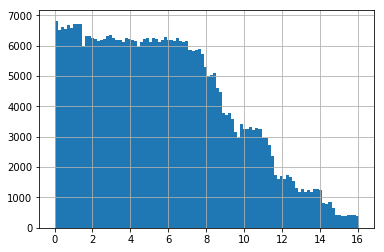

In [37]:
traintest.ydf.hist(bins=100);

In [41]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [24]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 137)

In [25]:
traintest.traindf.head()

mean       std    max    min  mean_change_abs  \
index                                                                   
quake_14_o38092704  3.666627  4.993766   90.0  -56.0         0.000007   
quake_05_o21076314  4.555954  5.038841   82.0  -83.0         0.000007   
quake_09_o34152517  4.604113  7.545202  167.0 -140.0        -0.000013   
quake_07_o29907005  4.280827  5.699806  103.0  -82.0         0.000000   
quake_03_o11370843  4.879340  5.799320  157.0 -119.0         0.000007   

                    mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                     
quake_14_o38092704      74976.414062     90.0      0.0         5.429905   
quake_05_o21076314      74998.843750     83.0      0.0         5.412611   
quake_09_o34152517      75000.164062    167.0      0.0         5.787636   
quake_07_o29907005      74986.921875    103.0      0.0         4.169597   
quake_03_o11370843      75024.054688    157.0      0.0         3.742580   

                    std_last_50000  ...  std_roll_mean_1000  \
index                               ...                       
quake_14_o38092704        5.069834  ...            0.240719   
quake_05_o21076314        4.721151  ...            0.240171   
quake_09_o34152517        7.067223  ...            0.249858   
quake_07_o29907005        5.847459  ...            0.227964   
quake_03_o11370843        7.001203  ...            0.223350   

                    max_roll_mean_1000  min_roll_mean_1000  \
index                                                        
quake_14_o38092704               4.350               2.807   
quake_05_o21076314               5.203               3.783   
quake_09_o34152517               5.431               3.425   
quake_07_o29907005               5.171               3.606   
quake_03_o11370843               5.707               4.202   

                    q01_roll_mean_1000  q05_roll_mean_1000  \
index                                                        
quake_14_o38092704               3.093               3.232   
quake_05_o21076314               4.066               4.160   
quake_09_o34152517               4.076               4.227   
quake_07_o29907005               3.763               3.882   
quake_03_o11370843               4.342               4.504   

                    q95_roll_mean_1000  q99_roll_mean_1000  \
index                                                        
quake_14_o38092704               4.059               4.192   
quake_05_o21076314               4.931               5.079   
quake_09_o34152517               5.053               5.311   
quake_07_o29907005               4.649               4.747   
quake_03_o11370843               5.233               5.347   

                    av_change_abs_roll_mean_1000  \
index                                              
quake_14_o38092704                 -5.369128e-07   
quake_05_o21076314                 -2.530201e-06   
quake_09_o34152517                 -3.536913e-06   
quake_07_o29907005                  2.013423e-07   
quake_03_o11370843                 -2.597315e-06   

                    av_change_rate_roll_mean_1000  abs_max_roll_mean_1000  
index                                                                      
quake_14_o38092704                   74388.601562                   4.350  
quake_05_o21076314                   74481.226562                   5.203  
quake_09_o34152517                   74545.054688                   5.431  
quake_07_o29907005                   74674.039062                   5.171  
quake_03_o11370843                   74716.171875                   5.707  

[5 rows x 137 columns]

In [29]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [30]:
testpred=[]
for fold in range(traintest.num_dataset()):
    print fold
    Xtr,ytr,Xte,yte=traintest.get_train_data(fold)
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 50000, n_jobs = 3, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    a = model.predict(testdf.values,  num_iteration=model.best_iteration)
    testpred.append(a)

0
(343940, 137) (343940,) (75419, 137) (75419,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.25158	valid_1's l1: 2.14828
[100]	training's l1: 1.92155	valid_1's l1: 2.00811
[150]	training's l1: 1.74475	valid_1's l1: 1.95564
[200]	training's l1: 1.62815	valid_1's l1: 1.95766
[250]	training's l1: 1.54433	valid_1's l1: 1.96799
[300]	training's l1: 1.47991	valid_1's l1: 1.96847
[350]	training's l1: 1.41728	valid_1's l1: 1.97188
Early stopping, best iteration is:
[166]	training's l1: 1.7026	valid_1's l1: 1.94866
1
(344797, 137) (344797,) (74562, 137) (74562,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.23727	valid_1's l1: 2.23666
[100]	training's l1: 1.92587	valid_1's l1: 2.21645
[150]	training's l1: 1.75284	valid_1's l1: 2.22547
[200]	training's l1: 1.64966	valid_1's l1: 2.24114
[250]	training's l1: 1.56297	valid_1's l1: 2.25311
[300]	training's l1: 1.4934	valid_1's l1: 2.26718
Early stopping, best iteration is

In [31]:
pred = reduce(lambda u,v: u+v, testpred)/len(testpred)

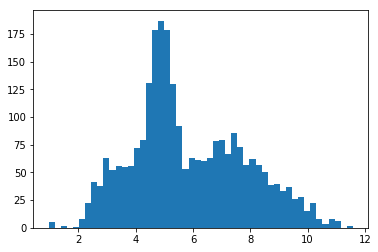

In [32]:
plt.hist(pred,bins=50);

In [33]:
a=pd.DataFrame(pred,index=testdf.index).reset_index()
a.columns=["seg_id","time_to_failure"]
a.shape

(2624, 2)

In [34]:
a.head()

seg_id  time_to_failure
0  seg_05a1b0         4.999468
1  seg_f0181d         5.070808
2  seg_5b7325         4.147944
3  seg_c6b514         3.419554
4  seg_52c139         9.347231

In [35]:
a.to_csv("../../input/sub/test_kaggle_cov5fold_lgb.csv",index=None)